In [11]:
import sys
import warnings
import datacube
from datacube.storage import masking
from datacube.helpers import ga_pq_fuser
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd
import xarray as xr
from datacube.utils import geometry
from datacube.utils.geometry import CRS
from datacube.helpers import write_geotiff
import os

sys.path.append('../10_Scripts')
import SpatialTools
import gdal
import DEADataHandling
import DEAPlotting

In [12]:
# Connect to datacube database
dc = datacube.Datacube(app='Snow monitoring with Landsat')


output='results/nsw/decadal'

lat, lon, buffer_m, buffer_n = -36.3, 148.35, 8000, 8000 #nsw
# lat, lon, buffer_m, buffer_n = -36.86895, 147.276, 30000, 30000 #vic

# lat, lon, buffer_m= -41.56728, 147.67106, 10000 #tas ben lomond

# ('2002-01-01', '2003-12-31'), ('2004-01-01', '2005-12-31'), ('2006-01-01', '2007-12-31')

# year='2004'

# Set up centre of area to analyse, and a buffer in metres around this centrepoint. Generally,
# aim to keep the buffer size to less than 10,000m to prevent having memory errors

# lat, lon, buffer_m = -36.3, 148.35, 10000
# lat, lon, buffer_m = -36.435, 148.29, 8000

# Set range of time to return data from both Landsat and Sentinel 2
time_range = ('2017-01-01', '2017-12-31')

resolution = (-25, 25)

landsat_goodquality_prop = 0.3

ndsi_threshold = 0.2
ndvi_threshold = 0.3
ndwi_threshold = 0.15

x, y = geometry.point(lon, lat, CRS('WGS84')).to_crs(CRS('EPSG:3577')).points[0]
query = {'x': (x - buffer_m, x + buffer_m),
         'y': (y - buffer_n, y + buffer_n),    
         'time': time_range,
         'crs': 'EPSG:3577',
         'output_crs': 'EPSG:3577',
         'resolution': resolution}

In [17]:
print('loading landsat_ds')
snow_mask = dict(                cloud_acca='no_cloud',
                                 #cloud_fmask='no_cloud',
                                 cloud_shadow_acca='no_cloud_shadow',
                                 #cloud_shadow_fmask='no_cloud_shadow',
                                 blue_saturated=False,
                                 green_saturated=False,
                                 red_saturated=False,
                                 nir_saturated=False,
                                 swir1_saturated=False,
                                 swir2_saturated=False,
                                 contiguous=True)

landsat_ds = DEADataHandling.load_clearlandsat(dc=dc, 
                                               product = 'nbar',
                                               query=query,
                                               mask_dict=snow_mask,
                                               sensors=['ls8'],
                                               bands_of_interest=['red', 'green', 'blue','nir', 'swir1'],
                                               masked_prop=landsat_goodquality_prop,
                                               mask_pixel_quality=True,
                                               ls7_slc_off=True)

loading landsat_ds
Loading ls8
    Loading 25 filtered ls8 timesteps
Returning ls8 data
    Replacing invalid -999 values with NaN (data will be coerced to float64)


In [25]:
wofls = dc.load(product = 'wofs_albers', like=landsat_ds)
# wofls = dc.load(product = 'wofs_annual_summary', like=landsat_ds)

In [27]:
dc = datacube.Datacube(app='dc-WOfS')

In [29]:
products = dc.list_products()
pd.set_option('display.max_colwidth', -1)
display_columns = ['name', 'description']
dc_products = products[display_columns]
dc_products[dc_products['name'].str.contains("wofs")]

,name,description
id,,
77,wofs_albers,Historic Flood Mapping Water Observations from Space
97,wofs_annual_summary,Water Observations from Space Annual Statistics
100,wofs_apr_oct_summary,Water Observations from Space April to October Statistics
85,wofs_filtered_summary,Water Observations from Space Statistics confidence filtered
101,wofs_nov_mar_summary,Water Observations from Space November to March Statistics
84,wofs_summary,Water Observations from Space Statistics


In [6]:
# ndsi_ds = (landsat_ds.green -landsat_ds.swir1) / (landsat_ds.green + landsat_ds.swir1)
# ndvi_ds = (landsat_ds.nir - landsat_ds.red) / (landsat_ds.nir + landsat_ds.red)
# ndwi_ds = (landsat_ds.green - landsat_ds.nir)/(landsat_ds.green + landsat_ds.nir)

# valid_ds = np.isfinite(landsat_ds.swir1)

# snow_ds1 = ndsi_ds > ndsi_threshold
# noveg_ds = ndvi_ds < ndvi_threshold
# nowater_ds = ndwi_ds < ndwi_threshold
# # snow_ds = noveg_ds & snow_ds1 & nowater_ds
# snow_ds = noveg_ds & snow_ds1

In [16]:
# ndsi_ds = (wofls.green - wofls.swir1) / (wofls.green + wofls.swir1)
# ndvi_ds = (landsat_ds.nir - landsat_ds.red) / (landsat_ds.nir + landsat_ds.red)
# ndwi_ds = (landsat_ds.green - landsat_ds.nir)/(landsat_ds.green + landsat_ds.nir)

# valid_ds = np.isfinite(landsat_ds.swir1)

# snow_ds1 = ndsi_ds > ndsi_threshold
# noveg_ds = ndvi_ds < ndvi_threshold
# nowater_ds = ndwi_ds < ndwi_threshold
# # snow_ds = noveg_ds & snow_ds1 & nowater_ds
# snow_ds = noveg_ds & snow_ds1

In [9]:
i=0

In [21]:
wetwofl = masking.make_mask(wofls, wet=True)
# wetwofl.water.isel(time=i).plot()

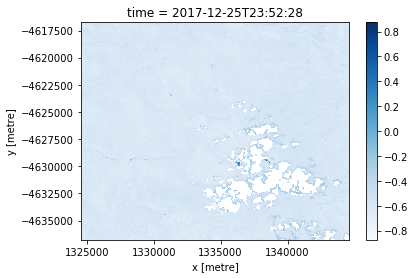

In [175]:
ndsi_ds.isel(time=i).plot(cmap='Blues')

In [92]:
len(landsat_ds.time)
time='2002'

In [93]:
file = open("copy1.txt", "a") 
file.write(time+','+str(len(landsat_ds.time))+'\n')
file.close() 

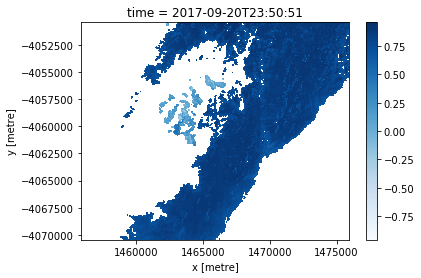

In [113]:
i=26


In [67]:
norm = valid_ds / 271 

In [17]:
snow_sum = snow_ds.sum(dim='time')
valid_sum = valid_ds.sum(dim='time')
snow_prop = (snow_sum / valid_sum)


In [53]:
# snow_ds1=snow_ds.squeeze()
# write_geotiff('snow_ds.tif', snow_ds1)

In [43]:
snow_prop1=snow_prop.squeeze()

In [47]:
transform, projection = SpatialTools.geotransform(snow_prop1, (snow_ds.x, snow_ds.y), epsg=3577)
SpatialTools.array_to_geotiff('decout.tif',
              snow_prop.values, geo_transform = transform, 
              projection = projection, 
              nodata_val=np.nan)

This function is written for use with the GDAL run 'array_to_geotiff' function and should be used with extreme caution elsewhere.


In [56]:
snow_sum = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/decadal2016_2018_snow.tif')
valid_sum = xr.open_rasterio('/g/data/r78/jt7365/dea-notebooks/SnowOFS/results/nsw/decadal/decadalvalid.tif')

In [59]:
snow_prop = snow_sum/valid_sum

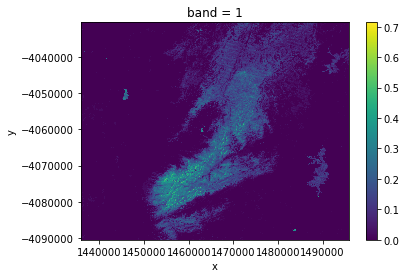

In [60]:
snow_prop.plot()

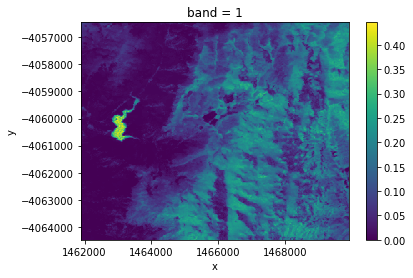

In [50]:
rio.plot()

In [44]:
write_geotiff('decade_ex.tif', snow_prop1)

ValueError: Can only write datasets with specified `crs` attribute

In [42]:
snow_prop.to_tiff('decade_example1.tif')

AttributeError: 'DataArray' object has no attribute 'to_tiff'

In [34]:
snow_prop

<xarray.DataArray (y: 321, x: 321)>
array([[0.136187, 0.123077, 0.078358, ..., 0.217391, 0.209559, 0.161417],
       [0.118774, 0.111111, 0.099237, ..., 0.181132, 0.162162, 0.199248],
       [0.118774, 0.110687, 0.083969, ..., 0.1875  , 0.174242, 0.187266],
       ...,
       [0.      , 0.      , 0.      , ..., 0.114815, 0.117216, 0.121324],
       [0.      , 0.003356, 0.003356, ..., 0.124088, 0.12    , 0.116364],
       [0.003413, 0.003425, 0.003425, ..., 0.135531, 0.132616, 0.147887]])
Coordinates:
  * y        (y) float64 -4.056e+06 -4.056e+06 ... -4.064e+06 -4.064e+06
  * x        (x) float64 1.462e+06 1.462e+06 1.462e+06 ... 1.47e+06 1.47e+06

In [35]:
ds_prop = xr.open_dataarray('decade_example.nc')

In [36]:
ds_prop

<xarray.DataArray (y: 321, x: 321)>
[103041 values with dtype=float64]
Coordinates:
  * y        (y) float64 -4.056e+06 -4.056e+06 ... -4.064e+06 -4.064e+06
  * x        (x) float64 1.462e+06 1.462e+06 1.462e+06 ... 1.47e+06 1.47e+06

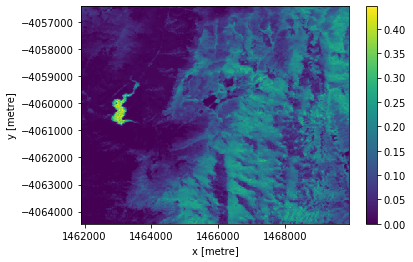

In [21]:
snow_prop.plot()
plt.savefig('decade_example.png')

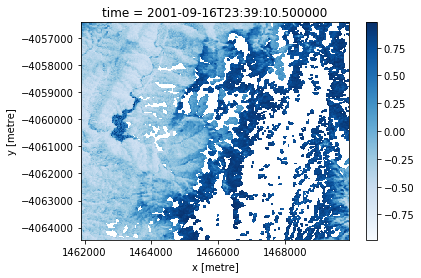

In [13]:
ndsi_ds.isel(time=47).plot(cmap='Blues')

In [258]:
snow_ds['time.month']

<xarray.DataArray 'month' (time: 49)>
array([ 1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  5,  5,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  9, 10, 10,
       10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12])
Coordinates:
  * time     (time) datetime64[ns] 2004-01-03T23:45:47.500000 ... 2004-12-29T23:40:01.500000

In [280]:
snow_sum = snow_ds.groupby('time.month').sum(dim='time')
valid_sum = valid_ds.groupby('time.month').sum(dim='time')
snow_prop = (snow_sum / valid_sum)

In [295]:
# snow_sum.isel(month=7).plot(cmap='Blues')
# valid_sum.isel(month=7).plot(cmap='Reds')


In [ ]:
# snow_month=snow_sum.where(snow_sum<1, ndsi_ds)

In [281]:
snow_month=snow_sum.where(snow_sum<1, 1)
valid_month=valid_sum.where(valid_sum<1,1)


In [283]:
snow_sum_pp=snow_month.sum(dim=['month'])
# snow_sum_pp.plot(cmap='Blues', robust=True, figsize=(8,8))

In [289]:
t = list(range(len(snow_month)))
# for i in t:
#     snow_prop_month.isel(month=i).plot()

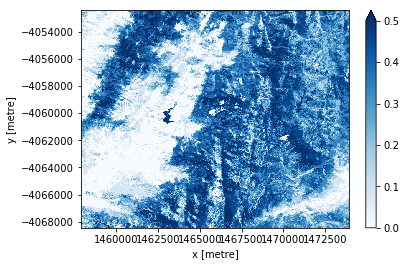

In [325]:
snow_month_sum=snow_month.sum(dim=['month'])
valid_month_sum=valid_month.sum(dim=['month']) # valis
snow_prop_month1 = snow_month_sum/valid_month_sum
snow_prop_month1.plot(cmap='Blues', robust=True)

In [316]:
type(snow_month)

xarray.core.dataarray.DataArray

In [318]:
transform, projection = SpatialTools.geotransform(snow_prop_perpixel, (snow_prop_perpixel.x, snow_prop_perpixel.y), epsg=3577)
SpatialTools.array_to_geotiff(str(year)+'annual_plot.tif',
              snow_prop_month1.values, geo_transform = transform, 
              projection = projection, 
              nodata_val=np.nan)

This function is written for use with the GDAL run 'array_to_geotiff' function and should be used with extreme caution elsewhere.


In [323]:
snow_prop_month1.to_netcdf('annual_snowprop_'+str(year)+'.nc')
snow_month_sum.to_netcdf('annual_snowsum_'+str(year)+'.nc')
valid_month_sum.to_netcdf('annual_validsum_'+str(year)+'.nc')

In [324]:
snow_month.to_netcdf('annual_snow_'+str(year)+'.nc')
valid_month.to_netcdf('annual_validpix_'+str(year)+'.nc')

In [303]:
# year = 2004
# from matplotlib.backends.backend_pdf import PdfPages
# import matplotlib.dates as mdates
# import matplotlib.pyplot as plt
# import matplotlib.backends.backend_pdf
# pdf = matplotlib.backends.backend_pdf.PdfPages('annual_snow_'+str(year)+'.pdf')


# # fig, ax = plt.subplots(figsize=(14,5))
# snow_prop_month1.plot(cmap='Blues', robust=True)
# # plt.ylim(-1, 1)
# plt.title('Annual_snow'+str(year))
# # plt.xlabel('Days of the year')
# # plt.ylabel('ave NDSI for valid pixels over 1200m')
# # fig.colorbar(sp)
# pdf.savefig()

# pdf.close()

In [ ]:
valid_sum_perpixel = valid_ds.sum(dim=['time'])
snow_prop_perpixel = (snow_sum_perpixel / valid_sum_perpixel)

In [210]:
# a.isel(month=0).plot()

In [163]:
snow_sum_perpixel = snow_sum.sum(dim=['month'])
valid_sum_perpixel = valid_ds.sum(dim=['time'])
snow_prop_perpixel = (snow_sum_perpixel / valid_sum_perpixel)
#snow_sum_perpixel.plot(cmap='Blues', robust=True)

In [28]:
snow_sum_perpixel = snow_ds.sum(dim=['time'])
valid_sum_perpixel = valid_ds.sum(dim=['time'])
snow_prop_perpixel = (snow_sum_perpixel / valid_sum_perpixel)
#snow_sum_perpixel.plot(cmap='Blues', robust=True)

In [19]:
transform, projection = SpatialTools.geotransform(snow_prop_perpixel, (snow_prop_perpixel.x, snow_prop_perpixel.y), epsg=3577)
SpatialTools.array_to_geotiff('out1_snow.tif',
              snow_prop_perpixel.values, geo_transform = transform, 
              projection = projection, 
              nodata_val=np.nan)

This function is written for use with the GDAL run 'array_to_geotiff' function and should be used with extreme caution elsewhere.


In [30]:

# snow_sum_perpixel.plot(cmap='Blues', robust=True, figsize=(8,8))